In [1]:
import rdflib
from nilearn import datasets

/home/gzanitti/miniconda3/envs/neurolang/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from rdflib.namespace import RDF, RDFS, OWL, SKOS
from rdflib import BNode


subClass others -> todo lo que este en other tambien esta en este 
subClass own -> todo lo que este en esta entidad tambien lo enceuntro en la subclass

part_of others -> los que puedo traer con la query, referenciando al own

In [ ]:
CAO_00216 Consciousness
    Others:
        - subClass CAO_00693 Autonoesis
        - subClass CAO_00695 Noesis
        - part_of CAO_00141 Attention
        - part_of CAO_00277 Episodic memory
    
CAO_00141 Attention
    Own:
        - part_of CAO_00549 Visual search
        - part_of CAO_00687 Attentional blink
        - part_of CAO_00216 Consciousness
    
    Others:
        - subClass CAO_00482 Selective attention
        - subClass CAO_00786 Exogenous attention
        - subClass CAO_00523 Sustained attention
        - subClass CAO_00691 Covert attention
        - subClass CAO_00690 Overt attention
        - subClass CAO_00414 Passive attention
        - subClass CAO_00262 Divided attention
        - subClass CAO_00541 Visual attention
        - subClass CAO_00149 Auditory attention
        
        - part_of CAO_00562 Attention span
        - part_of CAO_00563 Attentional focusing
        - part_of CAO_00797 Feature-based attention
        - part_of CAO_00142 Attention capacity
        

CAO_00277 Episodic memory
    Own:
        - part_of CAO_00216 Consciousness
        - subClass CAO_00248 Declarative memory
    
    Others:
        - subClass CAO_00504 Source memory
        - subClass CAO_00168 Autobiographical memory
        - part_of CAO_00693 Autonoesis
        
CAO_00693 Autonoesis
    Own:
        - subClass CAO_00216 Consciousness
        - part_of CAO_00277 Episodic memory
        - part_of CAO_00169 Autobiographical recall
    

        
CAO_00541 Visual attention
    Own:
        - subClass CAO_00141 Attention
    
    Others:
        - subClass CAO_00507 Spatial attention


CAO_00149 Auditory attention
    Own:
        - subClass CAO_00141 Attention
    
    Others:
        - subClass CAO_00370 Listening
        
        
        
CAO_00418 Perception
    Others:
        - subClass CAO_00662 Synchrony perception
        - subClas CAO_00624 Gustation processing
        - subClass CAO_00547 visual perception
        - subClass CAO_00408 object perception
        - subClass CAO_00411 olfactory perception
        - subClass CAO_00779 discrimination
        - subClass CAO_00147 audiovisual perception
        - subClass CAO_00730 animacy perception
        - subClass CAO_00887 detection
        - subClass CAO_00255 depth perception
        - subClass CAO_00503 Somatosensation
        - subClass CAO_00160 Auditory perception
        - subClass CAO_00675 visual awareness
        
        - part_of CAO_00728 agency
        - part_of CAO_00788 localization
        - part_of CAO_00626 Active maintenance
        - part_of CAO_00480 schema
        - part_of CAO_00410 Olfaction
        - part_of CAO_00148 Audition
        
        
CAO_00728 agency
    Own:
        - part_of CAO_00418 Perception

In [3]:
from nilearn import datasets, image
import pandas as pd
import numpy as np
import nibabel as nib

cogAt = datasets.utils._fetch_files(
    datasets.utils._get_dataset_dir('CogAt'),
    [
        (
            'cogat.xml',
            'http://data.bioontology.org/ontologies/COGAT/download?'
            'apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb&download_format=rdf',
            {'move': 'cogat.xml'}
        )
    ]
)[0]


cogAt_old = datasets.utils._fetch_files(
    datasets.utils._get_dataset_dir('ontology'),
    [
        (
            'cogat_old.xml',
            'https://data.bioontology.org/ontologies/COGAT/submissions/7/download?'
            'apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb',
            {'move': 'cogat_old.xml'}
        )
    ]
)[0]

mni_t1 = nib.load(datasets.fetch_icbm152_2009()['t1'])
mni_t1_4mm = image.resample_img(mni_t1, np.eye(3) * 2)

ns_database_fn, ns_features_fn = datasets.utils._fetch_files(
    datasets.utils._get_dataset_dir('neurosynth'),
    [
        (
            'database.txt',
            'https://github.com/neurosynth/neurosynth-data/raw/master/current_data.tar.gz',
            {'uncompress': True}
        ),
        (
            'features.txt',
            'https://github.com/neurosynth/neurosynth-data/raw/master/current_data.tar.gz',
            {'uncompress': True}
        ),
    ]
)

ns_database = pd.read_csv(ns_database_fn, sep=f'\t')
ijk_positions = (
    nib.affines.apply_affine(
        np.linalg.inv(mni_t1_4mm.affine),
        ns_database[['x', 'y', 'z']]
    ).astype(int)
)
ns_database['i'] = ijk_positions[:, 0]
ns_database['j'] = ijk_positions[:, 1]
ns_database['k'] = ijk_positions[:, 2]

ns_database = ns_database[["x", "y", "z", "id"]]

ns_features = pd.read_csv(ns_features_fn, sep=f'\t')
ns_terms = (
    pd.melt(
            ns_features,
            var_name='term', id_vars='pmid', value_name='TfIdf'
    )
    .query('TfIdf > 1e-3')[['pmid', 'term']]
)
ns_docs = ns_features[['pmid']].drop_duplicates()

/home/gzanitti/miniconda3/envs/neurolang/lib/python3.8/site-packages/nibabel/wrapstruct.py:212: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return self._structarr.tostring()


In [4]:
import rdflib
from rdflib import RDFS
g = rdflib.Graph()
g.load(cogAt_old)

from rdflib import BNode

onto_dic = {}
for obj in g.subjects():
    if isinstance(obj, BNode):
        continue
    for b in g.triples((obj, RDFS.label, None)):
        label = b[2].lower().replace(' ', '_')
        obj_split = obj.split('#')
        if len(obj_split) == 2:
            name = obj_split[1]
            namespace = obj_split[0].split('/')[-1]
            if name[0] != '' and namespace != '':
                res = namespace + ':' + name
            else:
                res = name
        else:
            obj_split = obj.split('/')
            res = obj_split[-1]

        onto_dic[label] = res

group_terms = ns_terms.groupby('term')
dic_term_pmid = {}

for term, ids in group_terms:
    term = term.lower().replace(' ', '_')
    dic_term_pmid[term] = ids

merge_dic = {}
for k, v in onto_dic.items():
    if k in dic_term_pmid.keys():
        vl = v.lower()
        merge_dic[vl] = dic_term_pmid[k]

/home/gzanitti/miniconda3/envs/neurolang/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from neurolang.frontend import NeurolangPDL

nl = NeurolangPDL()
nl.load_ontology(cogAt_old)

for k, v in dic_term_pmid.items():
    if k in onto_dic.keys():
        cogat_key = onto_dic[k]
        nl.add_tuple_set(v.pmid.values, name=cogat_key)

In [17]:
import nibabel

ns_database = ns_database[["x", "y", "z", "id"]]

TermInStudy = nl.add_tuple_set(ns_terms, name="TermInStudy")
FocusReported = nl.add_tuple_set(ns_database, name="FocusReported")
Voxel = nl.add_tuple_set(
    nibabel.affines.apply_affine(
        mni_t1_4mm.affine,
        np.transpose(mni_t1_4mm.get_fdata().nonzero())
    ),
    name='Voxel'
)
SelectedStudy = nl.add_uniform_probabilistic_choice_over_set(
    ns_docs, name="SelectedStudy"
)

In [19]:
from typing import Iterable, Callable
from neurolang.frontend import ExplicitVBR, ExplicitVBROverlay

@nl.add_symbol
def agg_create_region_overlay_MNI(
    x: Iterable, y: Iterable, z: Iterable, p: Iterable
) -> ExplicitVBR:
    voxels = nibabel.affines.apply_affine(
        np.linalg.inv(mni_t1_4mm.affine),
        np.c_[x, y, z]
    )
    return ExplicitVBROverlay(
        voxels, mni_t1_4mm.affine, p, image_dim=mni_t1_4mm.shape
    )

nl.add_symbol(np.exp, name="exp", type_=Callable[[float], float])

exp: typing.Callable[[float], float] = <ufunc 'exp'>

In [7]:
part_of = nl.new_symbol(name='ro.owl:part_of')
label = nl.new_symbol(name='rdf-schema:label')

perception = nl.new_symbol(name='cogat.owl:CAO_00418')

attention = nl.new_symbol(name='cogat.owl:CAO_00141')

listening = nl.new_symbol(name='cogat.owl:CAO_00370')
auditory_attention = nl.new_symbol(name='cogat.owl:CAO_00149')

spatial_attention = nl.new_symbol(name='cogat.owl:CAO_00507')
visual_attention = nl.new_symbol(name='cogat.owl:CAO_00541')

consciousness = nl.new_symbol(name='cogat.owl:CAO_00216')

attention_capacity = nl.new_symbol(name='cogat.owl:CAO_00142')

autonoesis = nl.new_symbol(name='cogat.owl:CAO_00693')
episodic_memory = nl.new_symbol(name='cogat.owl:CAO_00277')

In [40]:
with nl.scope as e:
    e.OpenWorld[e.a] = (
        part_of[e.a, e.b] &
        autonoesis[e.b]
    )
    
    e.EpisodicMemory[e.a] = (
        episodic_memory[e.a]
    )
    
    
    (e.VoxelReported @ e.exp(-e.d / 5.0))[e.x1, e.y1, e.z1, e.s] = (
        e.FocusReported(e.x2, e.y2, e.z2, e.s)
        & e.Voxel(e.x1, e.y1, e.z1)
        & (e.d == e.EUCLIDEAN(e.x1, e.y1, e.z1, e.x2, e.y2, e.z2))
        & (e.d < 4)
    )

    e.Result[e.x, e.y, e.z, e.PROB[e.x, e.y, e.z]] = (
           e.VoxelReported[e.x, e.y, e.z, e.s] // (
           e.SelectedStudy[e.s]
           & e.OpenWorld[e.s]
       )
    )
    
    e.ResultEM[e.x, e.y, e.z, e.PROB[e.x, e.y, e.z]] = (
           e.VoxelReported[e.x, e.y, e.z, e.s] // (
           e.SelectedStudy[e.s]
           & e.EpisodicMemory[e.s]
       )
    )
    
    e.VoxelActivationImg[agg_create_region_overlay_MNI[e.x, e.y, e.z, e.p]] = (
        e.Result(e.x, e.y, e.z, e.p)
    )
    
    e.VoxelActivationImgEM[agg_create_region_overlay_MNI[e.x, e.y, e.z, e.p]] = (
        e.Result(e.x, e.y, e.z, e.p)
    )
    
    f_term = nl.solve_all()
    #f_term = nl.query((e.a,), e.answer[e.a])


/home/gzanitti/miniconda3/envs/neurolang/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1123: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/gzanitti/miniconda3/envs/neurolang/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1123: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


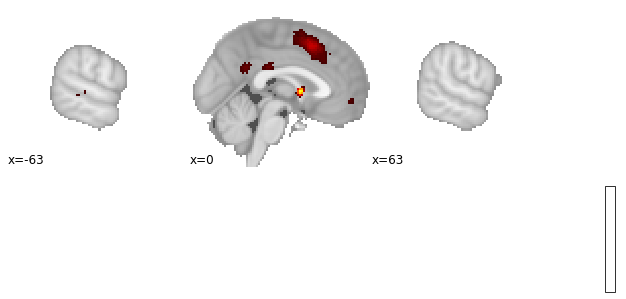

In [43]:
from nilearn import plotting

img_query = f_term['VoxelActivationImg']

result_image = (
    img_query
    .fetch_one()
    [0]
    .spatial_image()
)
img = result_image.get_fdata()

plot = plotting.plot_stat_map(
    result_image, threshold=np.percentile(img[img > 0], 95),
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
)
plotting.show()

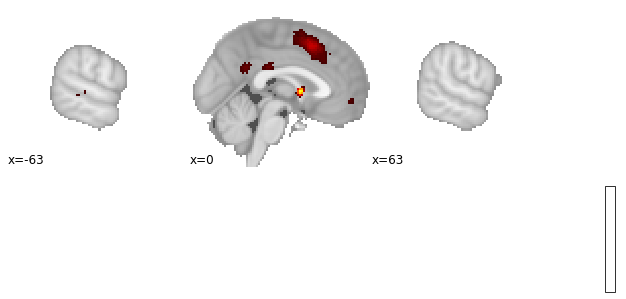

In [44]:
from nilearn import plotting

img_query = f_term['VoxelActivationImgEM']

result_image = (
    img_query
    .fetch_one()
    [0]
    .spatial_image()
)
img = result_image.get_fdata()

plot = plotting.plot_stat_map(
    result_image, threshold=np.percentile(img[img > 0], 95),
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
)
plotting.show()

In [45]:
ow = f_term['OpenWorld']
m = f_term['EpisodicMemory']

print(len(ow), len(m), len(set(ow).difference(set(m))))

4139 2744 1395
